<p style="text-align:center">
    <a href="https://github.com/ITHealer?tab=repositories" target="_blank">
    <img src="avatar_healer.jpg" width="200" alt="Link github"  />
    </a>
</p>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a>Collection data</a></li>
        <li><a>Pre-processing</a></li>
        <li><a>Word Embedding</a></li>
        <li><a>Modeling</a></li>
    </ol>
</div>
<br>
<hr>

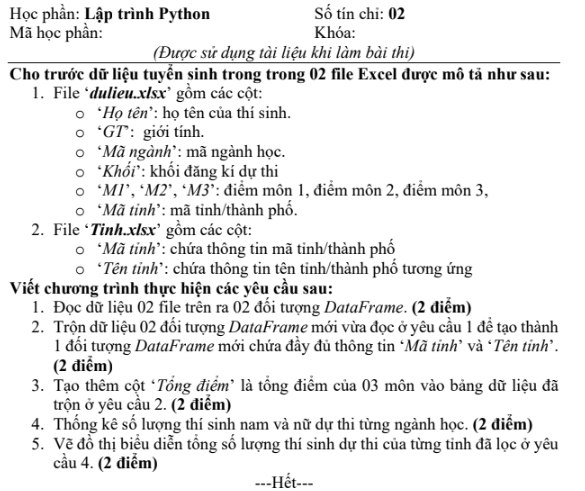

<details><summary><font color=green>Details</font></summary>

    
</details>

In [1]:
# import library 
import numpy as np
import pandas as pd

In [2]:
df_file1 = pd.read_excel('dulieu.xlsx')
df_file1.head()

,Họ tên,GT,Mã ngành,Khối,M1,M2,M3,Mã tỉnh
0,LA LAN THỊ Ả,Nữ,7380101,C00,5.0,3.75,3.75,39
1,NGÔ THỊ MỸ ÁI,Nữ,7340101,D01,5.2,6.00,4.20,35
2,NGUYỄN THỊ THÚY ÁI,Nữ,7340301,D01,5.0,6.50,1.80,38
3,NGUYỄN TÔ VĨNH ÁI,Nữ,7340101,D01,5.8,6.25,4.60,37
4,PHẠM THỊ KIM ÁI,Nữ,7340101,D01,6.8,6.75,5.40,39


In [3]:
df_file2 = pd.read_excel('tinh.xlsx')
df_file2.head()

,Mã tỉnh,Tên tỉnh
0,1,Hà Nội
1,2,Tp. Hồ Chí Minh
2,2,Tp. Hồ Hồ Chí
3,3,Hải Phòng
4,4,Đà Nẵng


In [4]:
df = pd.merge(df_file1, df_file2,how='outer',left_on=['Mã tỉnh'], right_on=['Mã tỉnh'])

In [6]:
df.head()

,Họ tên,GT,Mã ngành,Khối,M1,M2,M3,Mã tỉnh,Tên tỉnh
0,LA LAN THỊ Ả,Nữ,7380101.0,C00,5.00,3.75,3.75,39,Phú Yên
1,PHẠM THỊ KIM ÁI,Nữ,7340101.0,D01,6.80,6.75,5.40,39,Phú Yên
2,KPĂ Y AN,Nữ,7310205.0,C00,4.75,3.75,6.25,39,Phú Yên
3,LÊ MÔ HÒA AN,Nữ,7340101.0,A00,4.60,4.75,4.50,39,Phú Yên
4,TRƯƠNG THỊ XUÂN AN,Nam,7340101.0,D01,5.80,5.25,4.60,39,Phú Yên


In [7]:
df['Tổng điểm'] = (df[['M1','M2','M3']].sum(1))

In [8]:
df.head()

,Họ tên,GT,Mã ngành,Khối,M1,M2,M3,Mã tỉnh,Tên tỉnh,Tổng điểm
0,LA LAN THỊ Ả,Nữ,7380101.0,C00,5.00,3.75,3.75,39,Phú Yên,12.50
1,PHẠM THỊ KIM ÁI,Nữ,7340101.0,D01,6.80,6.75,5.40,39,Phú Yên,18.95
2,KPĂ Y AN,Nữ,7310205.0,C00,4.75,3.75,6.25,39,Phú Yên,14.75
3,LÊ MÔ HÒA AN,Nữ,7340101.0,A00,4.60,4.75,4.50,39,Phú Yên,13.85
4,TRƯƠNG THỊ XUÂN AN,Nam,7340101.0,D01,5.80,5.25,4.60,39,Phú Yên,15.65


## Thống kê số lượng sv Nam và Nữ dự thi từng ngành học

In [69]:
# Số lượng sv Nam, sv Nữ cho từng ngành học.

# df2 = df.groupby(['Mã ngành', 'GT']).size().reset_index(name='counts') 
# df2

# df3 = df.groupby(['Mã ngành', 'GT'])["GT"].count().to_frame()
# df3

# df4 = df.groupby(['Mã ngành', 'GT', 'Tên tỉnh']).size().reset_index(name='counts') 
# df4

In [71]:
df_cau_4 = df.groupby(['Mã ngành'])["GT"].count().to_frame()
df_cau_4

,GT
Mã ngành,
7140114.0,21
7220201.0,333
7229030.0,16
7310101.0,58
7310205.0,263
7310403.0,37
7310608.0,124
7310630.0,122
7340101.0,272


In [72]:
df_c4 = df.groupby(['Mã ngành'])["GT"].size().reset_index(name='counts') 
df_c4

,Mã ngành,counts
0,7140114.0,21
1,7220201.0,333
2,7229030.0,16
3,7310101.0,58
4,7310205.0,263
5,7310403.0,37
6,7310608.0,124
7,7310630.0,122
8,7340101.0,272
9,7340201.0,66


### Vẽ đồ thị biểu diễn tổng số lượng thí sinh dự thi của từng tỉnh theo yêu cầu đã lọc câu trên

In [75]:
df_c5 = df.groupby(['Mã ngành', 'Tên tỉnh'])["GT"].size().reset_index(name='counts') 
df_c5

,Mã ngành,Tên tỉnh,counts
0,7140114.0,Bình Định,8
1,7140114.0,Gia Lai,7
2,7140114.0,Kon Tum,2
3,7140114.0,Quảng Ngãi,1
4,7140114.0,Điện Biên,1
...,...,...,...
206,7850103.0,Kon Tum,1
207,7850103.0,Lâm Đồng,1
208,7850103.0,Phú Yên,8
209,7850103.0,Quảng Bình,1


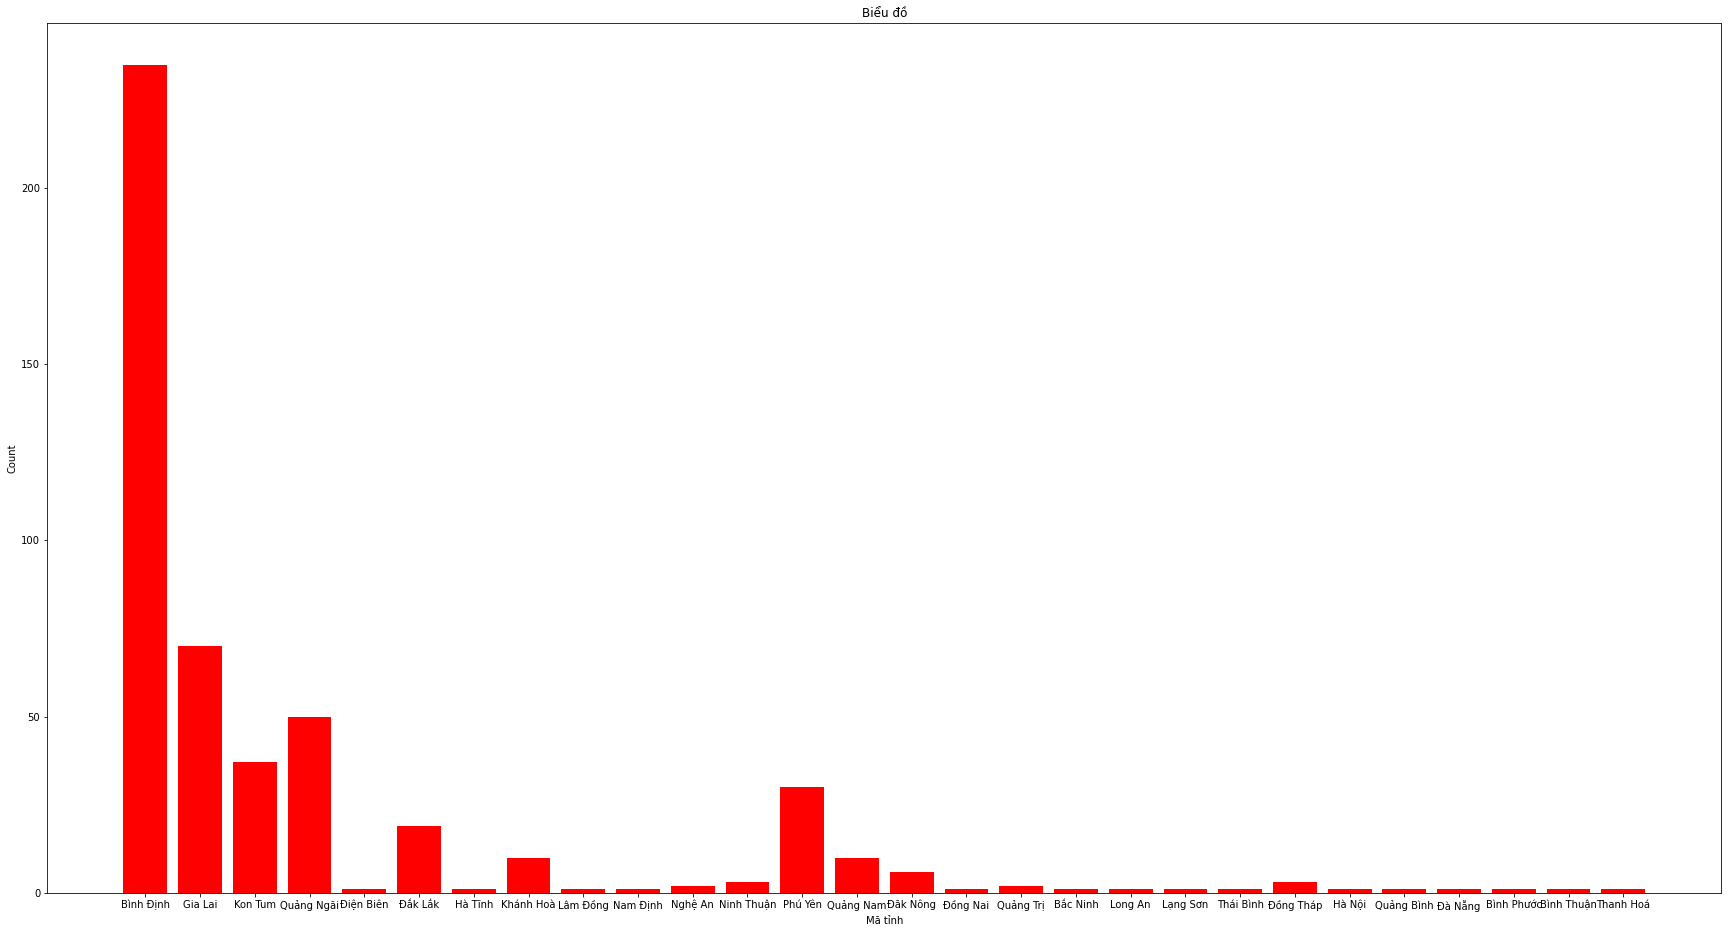

In [76]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(30, 16))
p1=plt.bar(df_c5['Tên tỉnh'], df_c5.counts, color='red')

plt.xlabel("Mã tỉnh")
plt.ylabel("Count")
plt.title("Biểu đồ")
plt.show()


In [10]:
# lst = [1, 2, 3, 4]
# math.fsum(lst)

# df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100
# df.loc[:, df.isnull().any()].columns

In [83]:
df_c6 = df.groupby(['Tên tỉnh'])["GT"].size().reset_index(name='counts') 
df_c6[df_c6['Tên tỉnh'] == 'Bình Định']

,Tên tỉnh,counts
5,Bình Định,1591


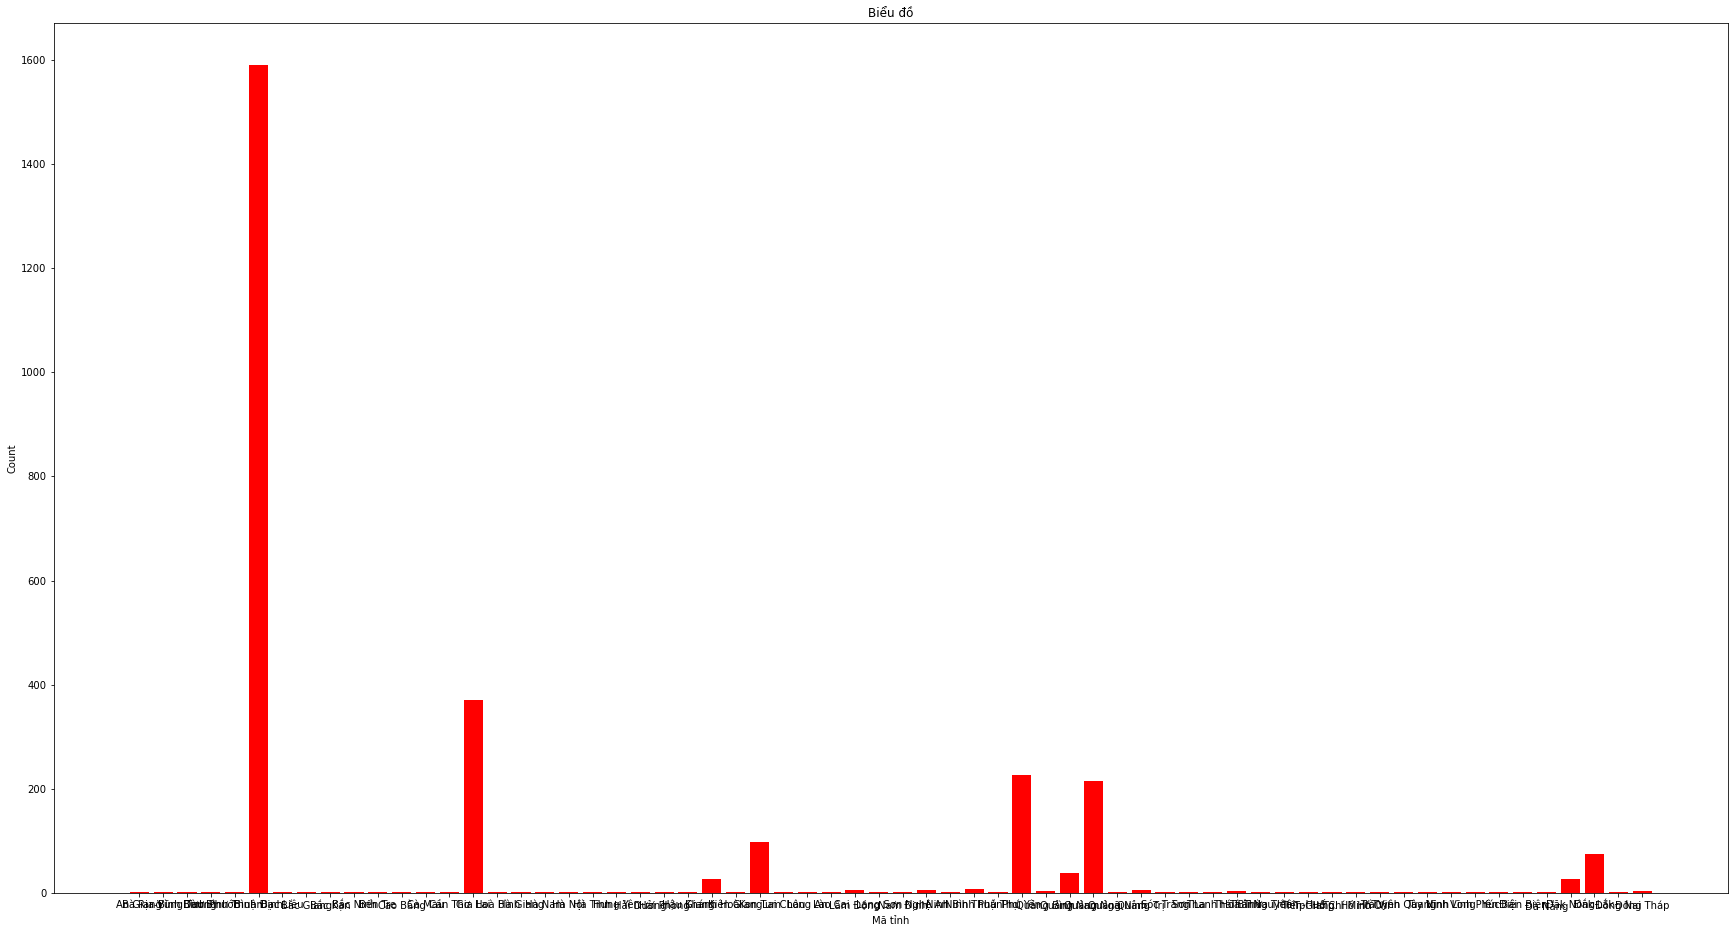

In [84]:
figure(figsize=(30, 16))
p1=plt.bar(df_c6['Tên tỉnh'], df_c6.counts, color='red')

plt.xlabel("Mã tỉnh")
plt.ylabel("Count")
plt.title("Biểu đồ")
plt.show()
